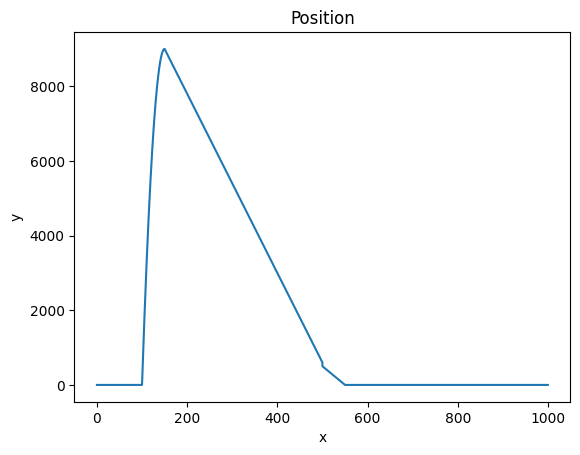

In [33]:
def parabol(x, shift,maximum):
    # function should be maximum at x=shift
    #should be 0 at x=0
    a = -maximum/(shift**2)
    return (a*(x-shift)**2 + maximum)*1000

def linear(x, slope, intercept):
    return (slope*x + intercept)

def flat(x, value):
    return value

def derivative_of_parabol(x, shift, maximum):
    a = -maximum/(shift**2)
    return 2*a*(x-shift)*1000

def derivative_of_linear(x, slope):
    return slope

def sec_derivative_of_parabol(x, shift, maximum):
    a = -maximum/(shift**2)
    return 2*a*1000

def sec_derivative_of_linear(x, slope):
    return 0

def pos(x):
    if x< 100:
        return 0
    elif x < 150:
        return parabol(x-100,50,9)
    elif x < 500:
        return linear(x-100,-24,10200)
    else:
        return max(linear(x-100,-10,4500),0)

def vel(x):
    if x < 100:
        return 0
    elif x < 150:
        return derivative_of_parabol(x-100,50,9)
    elif x < 500:
        return derivative_of_linear(x-100,-24)
    elif x < 550:
        return derivative_of_linear(x-100,-10)
    else:
        return 0
    
def acc(x):
    if x < 100:
        return 0
    elif x < 150:
        return sec_derivative_of_parabol(x-100,50,9)
    else:
        return 0




    
"""for i in range(0,500):
    print(i, parabol(i,50,9), linear(i,-24,10200), linear(i,-10,4500))"""
    

import matplotlib.pyplot as plt
import numpy as np
#plot position 

x = np.arange(0, 1000, 0.1)
y = [pos(i) for i in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Position')
plt.show()








In [36]:
import pandas as pd
import numpy as np

#check original data
data = pd.read_csv('data.csv')
print(data.columns)

Index(['altitude(m)', 'velocity(m/s)', 'Time(ms)', 'acceleration',
       'pressure(Pa)'],
      dtype='object')


In [60]:
#create a new dataframe with the same columns
new_data = pd.DataFrame(columns = data.columns)

#add the new data
new_data['Time(ms)'] = data['Time(ms)']
new_data['altitude(m)'] = [pos(i) for i in data['Time(ms)']]
new_data['velocity(m/s)'] = [vel(i) for i in data['Time(ms)']]
new_data['acceleration'] = [f"({acc(i)},0,0)" for i in data['Time(ms)']]
new_data['pressure(Pa)'] = data['pressure(Pa)']




In [61]:
# save the new data

new_data.to_csv('new_data1.csv', index=False)